In [55]:
# Comprobamos el environment
# ==============================================================================
import sys

print(sys.version)
print(sys.path)
print("---")
print(sys.executable)

3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 08:28:27) [Clang 14.0.6 ]
['/opt/anaconda3/envs/practica1b/lib/python312.zip', '/opt/anaconda3/envs/practica1b/lib/python3.12', '/opt/anaconda3/envs/practica1b/lib/python3.12/lib-dynload', '', '/Users/oscar/.local/lib/python3.12/site-packages', '/opt/anaconda3/envs/practica1b/lib/python3.12/site-packages', '/opt/anaconda3/envs/practica1b/lib/python3.12/site-packages/setuptools/_vendor']
---
/opt/anaconda3/envs/practica1b/bin/python


<h1 style="font-size: 36px;"> Procesado e ingeniería de variables</h1>

El objetivo de este notebook es preparar los datos para que estén listos para los modelos que vamos a probar. Esto incluye seleccionar las variables más relevantes y hacer la ingeniería necesaria para que todo funcione bien.

# Librerías: 

Las librerías utilizadas en este notebook son:

In [56]:
# Manipulación de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Visualización de datos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento de datos
# ==============================================================================
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import category_encoders as ce  # Codificadores categóricos adicionales
from sklearn.preprocessing import StandardScaler

# Modelos
# ==============================================================================
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Selección de características
# ==============================================================================
from sklearn.feature_selection import SelectFromModel, RFE

# Métricas de evaluación
# ==============================================================================
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, fbeta_score, f1_score, 
    precision_score, recall_score, confusion_matrix, roc_curve, auc, 
    roc_auc_score, precision_recall_curve, ConfusionMatrixDisplay, 
    classification_report
)

# Pipelines para procesamientos estructurados
# ==============================================================================
from sklearn.pipeline import Pipeline

In [57]:
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [58]:
# Configuración de la semilla 
# ==============================================================================
seed = 42

# Funciones:

Importamos las funciones necesarias para este notebook.

In [59]:
import sys
sys.path.append("../scr/")
import funciones 
sys.path.remove('../scr/')

In [61]:
# Recarga el módulo
# ==============================================================================
import importlib
sys.path.append("../scr/")
importlib.reload(funciones)
sys.path.remove('../scr/')

# Datos:

Importamos los datos procesados en el notebook anterior. 

In [62]:
# Datos de entrenamiento
# ==============================================================================
pd_loan_train = pd.read_csv("../data/interim/train_pd_data_preprocessing_missing_outlier.csv")\
                  .set_index("SK_ID_CURR") 

# Datos de test
# ==============================================================================
pd_loan_test = pd.read_csv("../data/interim/test_pd_data_preprocessing_missing_outlier.csv")\
                  .set_index("SK_ID_CURR")

In [63]:
# Tipo de cada columna
# ==============================================================================
pd_loan_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 246008 entries, 253977 to 221487
Data columns (total 121 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    NAME_CONTRACT_TYPE            object 
 1    CODE_GENDER                   object 
 2    FLAG_OWN_CAR                  object 
 3    FLAG_OWN_REALTY               object 
 4    CNT_CHILDREN                  int64  
 5    AMT_INCOME_TOTAL              float64
 6    AMT_CREDIT                    float64
 7    AMT_ANNUITY                   float64
 8    AMT_GOODS_PRICE               float64
 9    NAME_TYPE_SUITE               object 
 10   NAME_INCOME_TYPE              object 
 11   NAME_EDUCATION_TYPE           object 
 12   NAME_FAMILY_STATUS            object 
 13   NAME_HOUSING_TYPE             object 
 14   REGION_POPULATION_RELATIVE    float64
 15   DAYS_BIRTH                    float64
 16   DAYS_EMPLOYED                 float64
 17   DAYS_REGISTRATION             float64
 18   DA

In [64]:
pd_loan_train.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
253977,Cash loans,F,Y,N,0,405000.0,904500.0,38322.0,904500.0,Unaccompanied,...,0,0,0,0.0,0.0,0.0,1.0,0.0,6.0,0
387015,Cash loans,F,N,Y,0,202500.0,227520.0,8707.5,180000.0,Unaccompanied,...,0,0,0,0.0,0.0,0.0,0.0,0.0,9.0,0
184784,Cash loans,M,Y,Y,0,225000.0,462825.0,33808.5,378000.0,Unaccompanied,...,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0,0
284885,Cash loans,M,N,Y,0,135000.0,592560.0,28638.0,450000.0,Unaccompanied,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0
146800,Cash loans,M,Y,N,1,225000.0,927252.0,25627.5,774000.0,Unaccompanied,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0


# Procesado e ingeniería de variables: 

Como ya hemos comentado, el preprocesamiento incluye todas las transformaciones que se hacen a los datos para que los modelos puedan interpretarlos de la mejor manera. Es importante que este proceso se realice solo con los datos de entrenamiento y luego se aplique tanto al entrenamiento como al test. Esto asegura que ninguna información del test se filtre y termine afectando el ajuste del modelo.

En este caso, convertí las variables categóricas a formatos numéricos usando técnicas como Target Encoding y One-Hot Encoding, según lo que necesitaba cada variable. También escalé las variables numéricas para que todas estén en el mismo rango de valores, algo importante para modelos sensibles a las escalas, como los que usan distancias.

## Codificación de la variable objetivo:

Es importante tener en cuenta que la variable objetivo `TARGET` toma el valor 1 para aquellos clientes que presentan dificultades de pago, es decir, retrasos superiores a X días en al menos una de las primeras Z cuotas. Por otro lado, toma el valor 0 para todos los demás casos.

En las siguientes secciones, abordaremos este problema utilizando varias estrategias, ya que un desequilibrio en los datos puede afectar negativamente el desempeño de un modelo.

In [65]:
pd_loan_train['TARGET'].value_counts()

TARGET
0    226148
1     19860
Name: count, dtype: int64

In [66]:
# Separación de variables predictoras y variable objetivo
# ==============================================================================
X_train = pd_loan_train.drop('TARGET',axis=1)
X_test = pd_loan_test.drop('TARGET',axis=1)
y_train = pd_loan_train['TARGET']
y_test = pd_loan_test['TARGET']

## Codificación de las variables categoricas:

Para este proyecto, decidí codificar las variables categóricas tipo string de dos formas: las que tienen pocas categorías (tres o menos) las convertí con One-Hot Encoding, y las que tienen más de tres las transformé usando Target Encoding.

La idea es: One-Hot Encoding funciona bien para pocas categorías porque no asume relaciones entre ellas, mientras que Target Encoding es mejor para muchas categorías, ya que ayuda a reducir la cantidad de columnas y capta mejor la relación con la variable objetivo.

Es importante mencionar también que pese a conocer otros métdos de codificación de variables categóricas, como Ordinal Encoding o Mean Encoding, he optado por no usar esta otras codificaciones en este proyecto por varias razones. Por ejemplo, Ordinal Encoding asume un orden inherente entre las categorías, lo cual no aplica en la mayoría de las variables utilizadas aquí. Por otro lado, Mean Encoding, aunque similar al Target Encoding, puede introducir problemas de sobreajuste si no se aplica correctamente. 

In [67]:
# Separación de las variables categóricas
# ==============================================================================
list_columns_cat = list(X_train.select_dtypes("object", "category").columns)
list_other = list(set(X_train.columns)-set(list_columns_cat))

In [68]:
list_columns_cat

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']


Para lograr este objetivo, separo las columnas categóricas con cadenas de texto según la cantidad de valores únicos que tienen, lo que me permite decidir si aplicar One-Hot Encoding o Target Encoding en cada caso.

In [69]:
list_columns_more_three_cat, list_columns_less_three_cat = funciones.separar_por_unicos(X_train, list_columns_cat)

In [70]:
# Variables categóricas con más de tres valores únicos
# ==============================================================================
list_columns_more_three_cat

['NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

In [71]:
# Variables categóricas con más de tres o menos valores únicos
# ==============================================================================
list_columns_less_three_cat

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'EMERGENCYSTATE_MODE']

Empezamos codificando con One-Hot Encoding, que funciona muy bien para variables con pocas categorías.

In [72]:
# Codificación con OHE
# ==============================================================================
ohe = ce.OneHotEncoder(cols=list_columns_less_three_cat)
model_ohe = ohe.fit(X_train, y_train)

In [73]:
model_ohe

OneHotEncoder(cols=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
                    'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE'])

In [74]:
# Codificación de los datos de entrenamiento
# ==============================================================================
X_train_ohe = model_ohe.transform(X_train, y_train)

# Codificación de los datos de test
# ==============================================================================
X_test_ohe = model_ohe.transform(X_test, y_test)

Hay que tener en cuenta que el One-Hot Encoding aumenta el número de columnas en el dataset, ya que crea una columna por cada categoría única. Para evitar tener demasiadas columnas, prefiero crear solo n−1 columnas, eliminando una categoría y manteniendo la información necesaria para el modelo.

In [75]:
for col in list_columns_less_three_cat:
    encoded_cols = [c for c in X_train_ohe.columns if c.startswith(col + '_')]    
    if len(encoded_cols) > 1:
        X_train_ohe.drop(encoded_cols[-1], axis=1, inplace=True)
        X_test_ohe.drop(encoded_cols[-1], axis=1, inplace=True) 

Además, decido eliminar una columna extra en `CODE_GENDER`. Aunque solo existen dos valores posibles (masculino y femenino), el modelo creó tres columnas, probablemente porque trató los valores faltantes como una categoría adicional. 

In [76]:
# Emiliminar columna adicional en CODE_GENDER para train y test
# ==============================================================================
X_train_ohe.drop('CODE_GENDER_2', axis=1, inplace=True)
X_test_ohe.drop('CODE_GENDER_2', axis=1, inplace=True)

In [77]:
X_train_ohe.head()

,NAME_CONTRACT_TYPE_1,CODE_GENDER_1,FLAG_OWN_CAR_1,FLAG_OWN_REALTY_1,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
253977,1,1,1,1,0,405000.0,904500.0,38322.0,904500.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,6.0
387015,1,1,0,0,0,202500.0,227520.0,8707.5,180000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,9.0
184784,1,0,1,0,0,225000.0,462825.0,33808.5,378000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
284885,1,0,0,0,0,135000.0,592560.0,28638.0,450000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
146800,1,0,1,1,1,225000.0,927252.0,25627.5,774000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Seguimos con el Target Encoding, que funciona mejor para variables con muchas categorías.

In [78]:
# Codificación con Target Encoding
# ==============================================================================
te = ce.TargetEncoder(cols=list_columns_more_three_cat)  
model_te = te.fit(X_train_ohe, y_train)  

In [79]:
model_te

TargetEncoder(cols=['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
                    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                    'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
                    'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
                    'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
                    'WALLSMATERIAL_MODE'])

In [80]:
# Codificación de los datos de entrenamiento
# ==============================================================================
X_train_t = model_te.transform(X_train_ohe) 

# Codificación de los datos de test
# ==============================================================================
X_test_t = model_te.transform(X_test_ohe, y_test)

In [81]:
X_train_t.head()

,NAME_CONTRACT_TYPE_1,CODE_GENDER_1,FLAG_OWN_CAR_1,FLAG_OWN_REALTY_1,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
253977,1,1,1,1,0,405000.0,904500.0,38322.0,904500.0,0.081889,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,6.0
387015,1,1,0,0,0,202500.0,227520.0,8707.5,180000.0,0.081889,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,9.0
184784,1,0,1,0,0,225000.0,462825.0,33808.5,378000.0,0.081889,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
284885,1,0,0,0,0,135000.0,592560.0,28638.0,450000.0,0.081889,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
146800,1,0,1,1,1,225000.0,927252.0,25627.5,774000.0,0.081889,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Estandarización y escalado de variables numéricas:

Cuando tenemos variables numéricas, algunos modelos necesitan que estén escaladas para que sus valores estén en la misma escala. Esto es importante porque algoritmos como SVM, KNN y Regresión logística son sensibles a la escala y, si no se igualan, algunas variables podrían dominar el modelo sin tener una relación real con la variable objetivo. 

Para solucionarlo, usé el StandardScaler de sklearn, que centra y escala los datos, dividiendo cada predictor entre su desviación típica después de ser centrado, lo que les da una distribución normal con media 0 y desviación estándar 1.

In [82]:
scaler = StandardScaler()
model_scaled = scaler.fit(X_train_t)

# Estandarización de los datos de entrenamiento
# ==============================================================================
X_train_scaled = pd.DataFrame(scaler.transform(X_train_t), columns=X_train_t.columns, index=X_train_t.index)

# Estandarización de los datos de test
# ==============================================================================
X_test_scaled = pd.DataFrame(scaler.transform(X_test_t), columns=X_test_t.columns, index=X_test.index)

In [83]:
X_train_scaled.describe()

,NAME_CONTRACT_TYPE_1,CODE_GENDER_1,FLAG_OWN_CAR_1,FLAG_OWN_REALTY_1,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,...,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05
mean,4.780122e-17,7.714265e-17,2.547112e-17,3.541045e-17,1.935155e-18,-2.023537e-16,1.397789e-16,1.852117e-17,5.139714e-17,5.238667e-15,...,-1.058559e-17,-1.149540e-17,6.007646e-18,-7.162962e-18,4.477573e-17,-3.083251e-17,5.386663e-18,-4.528841e-17,3.924466e-18,1.338723e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-3.083250e+00,-1.387811e+00,-7.176709e-01,-6.651419e-01,-5.762670e-01,-1.278748e+00,-1.377395e+00,-1.761093e+00,-1.348752e+00,-8.080729e+00,...,-9.073941e-02,-2.436861e-02,-2.290520e-02,-1.826017e-02,-7.151095e-02,-5.835934e-02,-1.558722e-01,-2.691588e-01,-2.945512e-01,-1.006595e+00
25%,3.243331e-01,-1.387811e+00,-7.176709e-01,-6.651419e-01,-5.762670e-01,-5.019833e-01,-8.183922e-01,-7.301912e-01,-8.126309e-01,3.289573e-01,...,-9.073941e-02,-2.436861e-02,-2.290520e-02,-1.826017e-02,-7.151095e-02,-5.835934e-02,-1.558722e-01,-2.691588e-01,-2.945512e-01,-4.395962e-01
50%,3.243331e-01,7.205592e-01,-7.176709e-01,-6.651419e-01,-5.762670e-01,-1.800083e-01,-2.102536e-01,-1.508724e-01,-2.399558e-01,3.289573e-01,...,-9.073941e-02,-2.436861e-02,-2.290520e-02,-1.826017e-02,-7.151095e-02,-5.835934e-02,-1.558722e-01,-2.691588e-01,-2.945512e-01,-4.395962e-01
75%,3.243331e-01,7.205592e-01,1.393396e+00,1.503439e+00,8.062657e-01,3.029542e-01,5.198593e-01,5.167117e-01,3.814576e-01,3.289573e-01,...,-9.073941e-02,-2.436861e-02,-2.290520e-02,-1.826017e-02,-7.151095e-02,-5.835934e-02,-1.558722e-01,-2.691588e-01,-2.945512e-01,6.944007e-01
max,3.243331e-01,7.205592e-01,1.393396e+00,1.503439e+00,2.569185e+01,1.594801e+02,8.572847e+00,1.402348e+01,9.507705e+00,5.762958e+00,...,1.102057e+01,4.103640e+01,4.365820e+01,5.476402e+01,5.066321e+01,8.556906e+01,4.155837e+01,2.756211e+01,3.346131e+02,1.316837e+01


# Selección de variables:

La selección de variables es un paso clave para mejorar nuestros modelos. El objetivo es encontrar el menor número de variables necesarias sin perder capacidad predictiva. Este proceso es iterativo y requiere revisar constantemente cómo cada variable influye en el rendimiento del modelo. Para hacerlo, probaremos diferentes enfoques según el problema y las características de los datos.

En este análisis, usé tres métodos principales: regularización en regresión (Ridge y Lasso) y árboles de decisión. Elegiremos el mejor enfoque basándonos en resultados como tiempo de cómputo, simplicidad y robustez.

También probé métodos como RFE y Boruta, pero debido al alto tiempo de cómputo y su similitud con los métodos anteriores, decidí no incluirlos para mantener el análisis más rápido y directo.

## Regresiones con regularización:

La regularización añade penalizaciones a los coeficientes del modelo para evitar que se ajuste demasiado a los datos, reducir el impacto de variables menos importantes y hacer que el modelo sea más robusto y capaz de generalizar mejor.

### Regularización Ridge:

Vamos a implementar la regularización Ridge, un método que penaliza los coeficientes del modelo usando la norma L2. Esto ayuda a reducir el impacto de las variables menos relevantes y a evitar el sobreajuste, aunque no elimina ninguna variable por completo.

In [84]:
sel_ridge = SelectFromModel(LogisticRegression(C=1, penalty='l2'), threshold = 0.08)
sel_ridge.fit(X_train_scaled, y_train)

SelectFromModel(estimator=LogisticRegression(C=1), threshold=0.08)

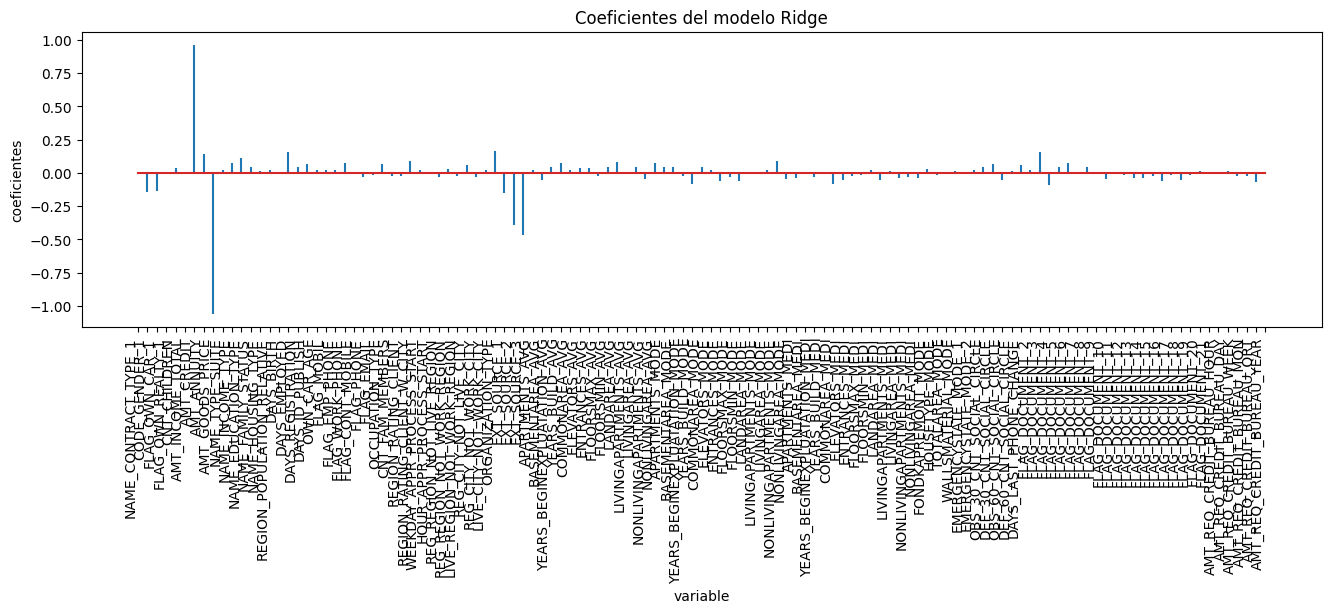

In [85]:
# Coeficientes de la regularización Ridge
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train_scaled.columns,
                         'coef': sel_ridge.estimator_.coef_.flatten()}
                  )

# Visualizamos los coeficientes de la regularización Ridge
# ==============================================================================
fig, ax = plt.subplots(figsize=(16, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo Ridge');

In [86]:
# Mostramos las variables seleccionadas con la regularización Ridge
# ==============================================================================
sel_ridge.get_support()
selected_feat = X_train_scaled.columns[sel_ridge.get_support()]
selected_feat

Index(['CODE_GENDER_1', 'FLAG_OWN_CAR_1', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_EDUCATION_TYPE', 'DAYS_EMPLOYED',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BUILD_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'COMMONAREA_MEDI', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4'],
      dtype='object')

In [87]:
# Mostramos la cantidad de variables seleccionadas con la regularización Ridge
# ==============================================================================
print('total features: {}'.format((X_train_scaled.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 121
selected features: 17


### Regularización Lasso:

Ahora aplicaremos la regularización Lasso, que utiliza la norma L1 para penalizar los coeficientes del modelo. Este método no solo reduce el impacto de las variables menos relevantes, sino que además puede eliminar por completo aquellas que no aporten al modelo, dejando sus coeficientes en cero.

In [88]:
sel_lasso = SelectFromModel(LogisticRegression(C=1, penalty='l1', 
                                          solver='saga'), threshold = 0.08) 
sel_lasso.fit(X_train_scaled, y_train)

SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1', solver='saga'),
                threshold=0.08)

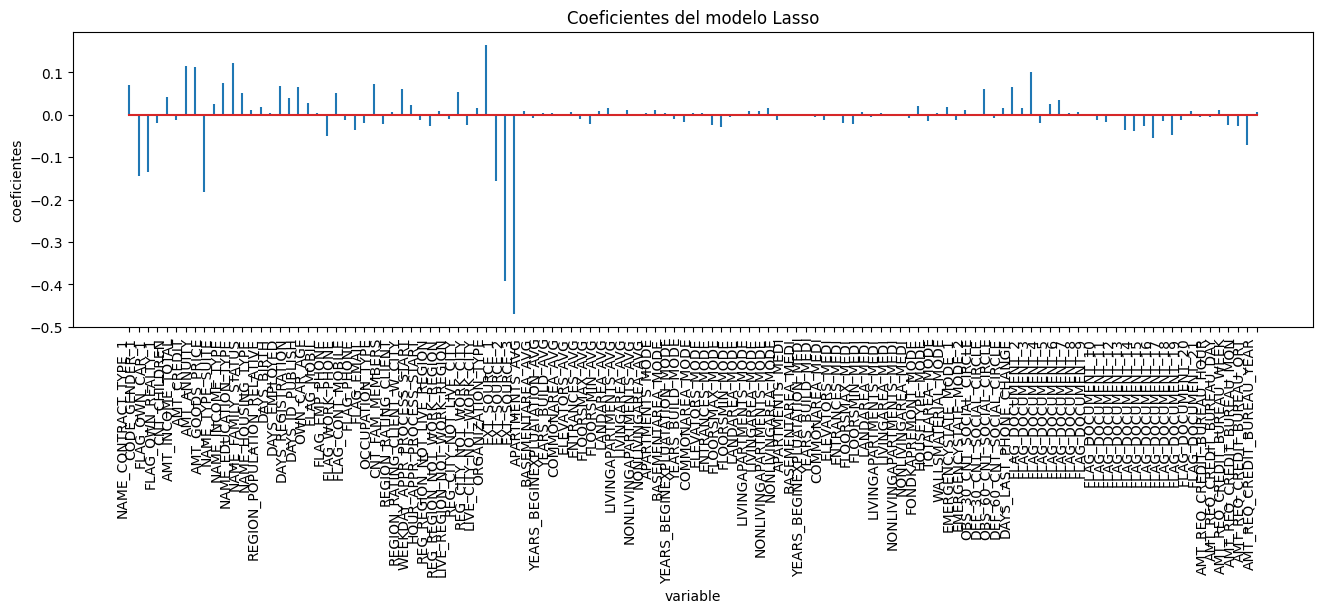

In [89]:
# Coeficientes de la regularización Lasso
# ==============================================================================
df_coeficientes_lasso = pd.DataFrame(
                        {'predictor': X_train_scaled.columns,
                         'coef': sel_lasso.estimator_.coef_.flatten()}
                  )

# Visualizamos los coeficientes de la regularización Lasso
# ==============================================================================
fig, ax = plt.subplots(figsize=(16, 3.84))
ax.stem(df_coeficientes_lasso.predictor, df_coeficientes_lasso.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo Lasso');

In [90]:
# Mostramos las variables seleccionadas con la regularización Lasso
# ==============================================================================
sel_lasso.get_support()
selected_feat_lasso = X_train_scaled.columns[sel_lasso.get_support()]
selected_feat_lasso

Index(['CODE_GENDER_1', 'FLAG_OWN_CAR_1', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_EDUCATION_TYPE', 'ORGANIZATION_TYPE',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_3'],
      dtype='object')

In [91]:
# Mostramos la cantidad de variables seleccionadas con la regularización Lasso
# ==============================================================================
print('total features: {}'.format((X_train_scaled.shape[1])))
print('selected features: {}'.format(len(selected_feat_lasso)))

total features: 121
selected features: 11


La diferencia entre Lasso y Ridge es que Lasso puede eliminar algunas variables al llevar sus coeficientes exactamente a cero, lo que ayuda a simplificar el modelo al descartar predictores poco relevantes. En cambio, Ridge no elimina variables, sino que reduce sus coeficientes de forma proporcional, lo que es útil cuando hay alta correlación entre ellas.

En nuestro caso, Ridge es más adecuado porque distribuye la influencia de las variables de manera equilibrada, manteniendo la estabilidad del modelo incluso en presencia de correlaciones fuertes. Esta capacidad de ajustar todos los coeficientes a la vez lo hace más robusto y menos sensible a pequeños cambios en los datos. Ahora profundizaremos en esta idea con más detalles.

## Arboles de decisión:

Los árboles de decisión son un algoritmo muy usado para clasificación y regresión. Lo mejor de este método es que es fácil de entender, ya que muestra de forma visual cómo el modelo toma decisiones. El algoritmo divide los datos poco a poco según los valores de las variables, eligiendo en cada paso la que mejor separa la información.

En este caso, lo usaremos para comprobar que lo que conseguimos con las regresiones con regularización tiene sentido y es consistente, asegurándome de que las selecciones de variables sean las correctas.

In [92]:
clf = RandomForestClassifier(n_estimators=200,
                             criterion='gini',
                             max_depth=6 ,
                             random_state=seed)

clf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=6, n_estimators=200, random_state=42)

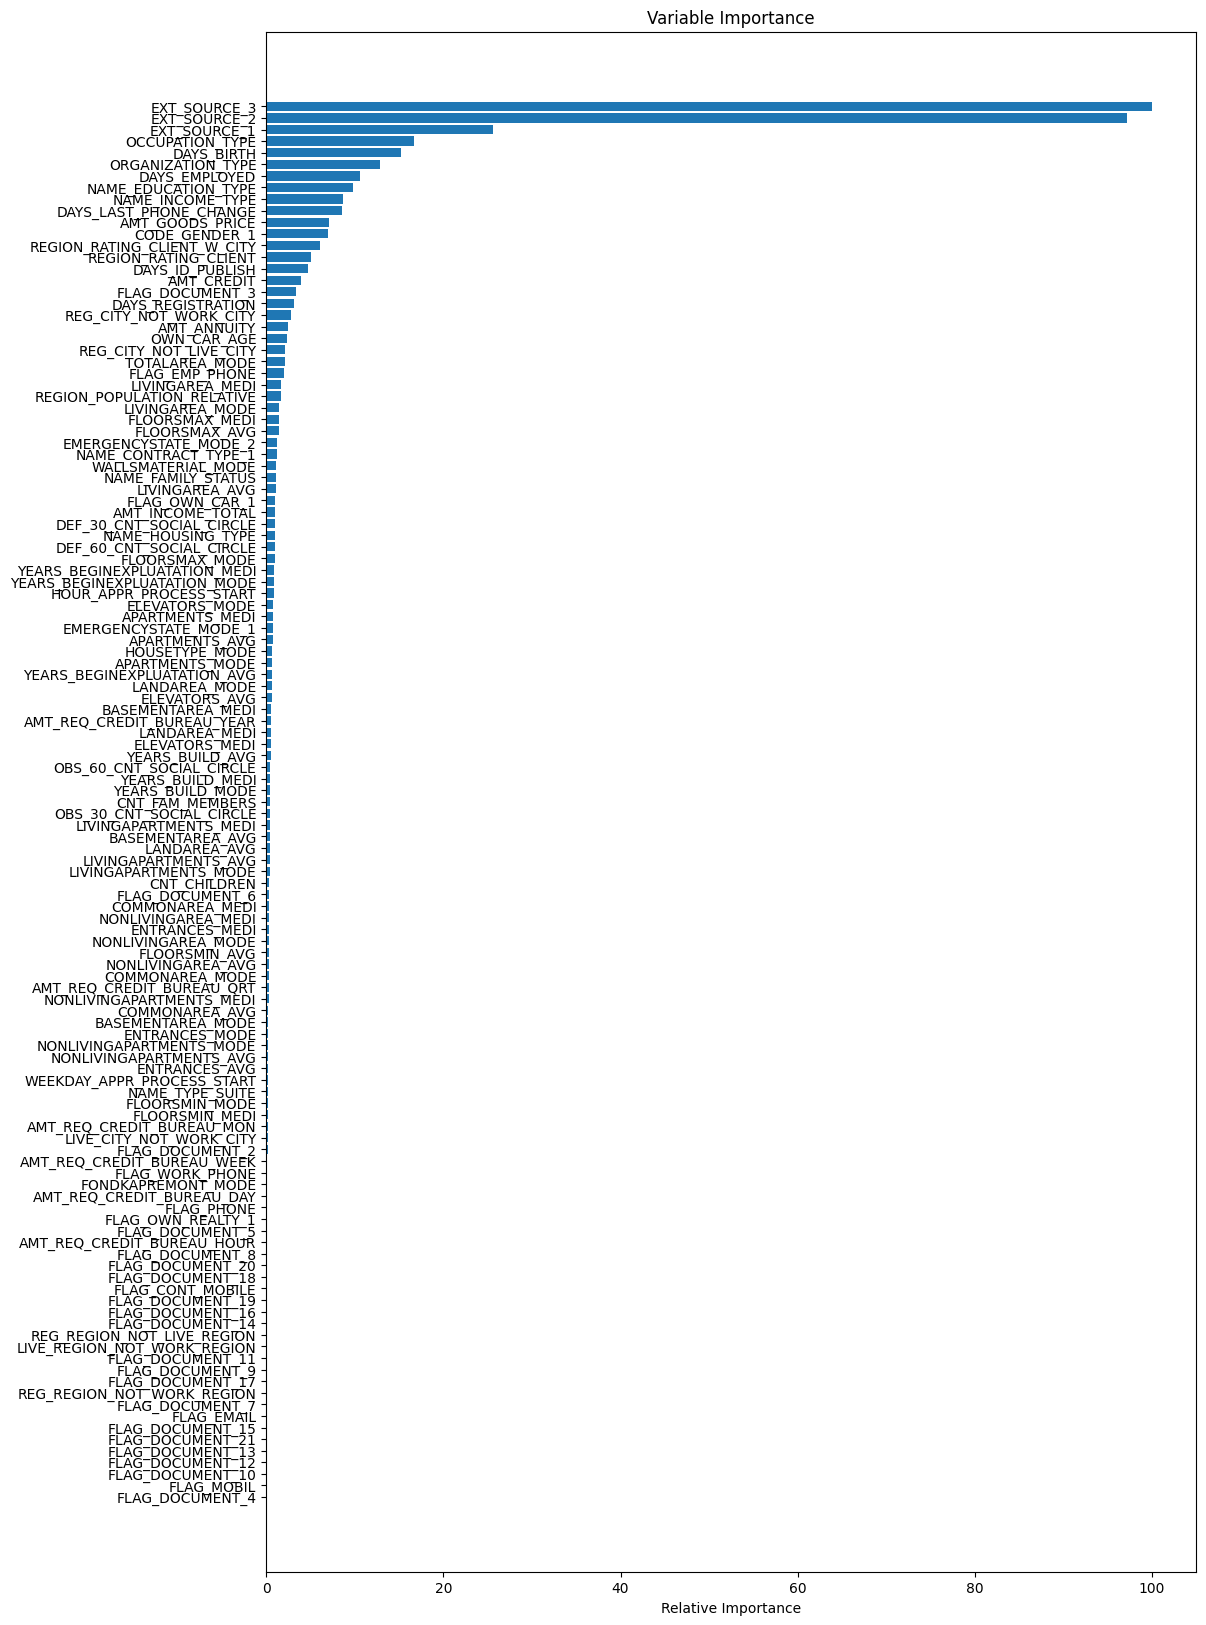

In [93]:
# Estimamos la importancia de las variables según el arbol de decisión
# ==============================================================================
feature_importance = clf.feature_importances_ 
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

# Visualizamos la importancia de las variables según el arbol de decisión
# ==============================================================================
plt.figure(figsize=(12, 20))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train_scaled.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [94]:
#  Mostramos la tabla con las 20 variables más importantes según el arbol de decisión
# ==============================================================================
feature_importance_df = pd.DataFrame({'Feature': X_train_scaled.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

feature_importance_df

,Feature,Importance
41,EXT_SOURCE_3,100.000000
40,EXT_SOURCE_2,97.209417
39,EXT_SOURCE_1,25.639135
26,OCCUPATION_TYPE,16.737112
15,DAYS_BIRTH,15.203717
38,ORGANIZATION_TYPE,12.791217
16,DAYS_EMPLOYED,10.622665
11,NAME_EDUCATION_TYPE,9.770117
10,NAME_INCOME_TYPE,8.704047
94,DAYS_LAST_PHONE_CHANGE,8.579562


Como podemos ver, las variables que seleccionamos con la regularización de Ridge coinciden bastante bien con las más importantes según el árbol de decisión. Esto es una buena señal, ya que sugiere que hemos elegido características relevantes y útiles para el modelo, evitando incluir información innecesaria que podría complicar el análisis.

Algo que considero muy interesante de comentar es el hecho de que unas de las variables que seleccionamos es el genero del cliente. Es interesante notar que una de las variables seleccionadas es el género del cliente. Esto nos lleva a un punto importante: en muchos países, no se permite usar características como género, raza o religión para decidir si alguien recibe un préstamo. Aun así, es posible que el género esté relacionado con otros factores que sí son relevantes y legales para las predicciones, lo que podría explicar por qué el modelo lo considera importante.

Esto nos hace pensar en algo fundamental: debemos cuidar que los modelos no introduzcan sesgos o discriminación en sus resultados. No solo porque lo exijan las normas, sino porque queremos que las decisiones sean justas y éticas.

He decidido mantener esta variable porque el análisis que estamos haciendo es puramente académico y no tiene un impacto directo en decisiones reales. Esto nos permitirá explorar su influencia en el modelo sin consecuencias prácticas.

## Comprobación de la selección de variables: 

Para verificar si la selección de variables es realmente efectiva, necesitamos probar algunos modelos. Esto significa ajustar y evaluar algoritmos como Random Forest y Gradient Boosting, tanto con todas las variables como solo con el subconjunto que elegimos. De esta manera, podremos comparar el rendimiento de ambos enfoques y determinar si la selección de variables que realizamos es adecuada y no pierde precisión.

Sin embargo, es importante aclarar que con esto no estamos buscando encontrar el mejor modelo. Ese proceso vendrá más adelante, ya que ahora solo queremos comprobar que nuestra selección de variables tiene sentido y que las características elegidas aportan valor al rendimiento del modelo. 

Es importante tener en cuenta algo clave: cuando tenemos datos desbalanceados, la precisión no siempre es la mejor métrica. Ahora mismo, lo que estamos haciendo es comprobar que la selección de variables sea la correcta. Por eso, no vamos a fijarnos demasiado en los valores de las métricas, sino en que sean similares en ambos casos. Lo importante es que el proceso de selección esté bien hecho, más allá de los números exactos.

In [95]:
# Entrenamos los modelos con todas las variables disponibles
# ==============================================================================

classifiers = [
    RandomForestClassifier(),
    GradientBoostingClassifier()
    ]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train_scaled, y_train) 
    
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test_scaled, y_test))
    
    y_pred = pipe.predict(X_test_scaled)
    y_true = y_test
    
    print(f'''Accuracy: {accuracy_score(y_true, y_pred):.5f} ''')

RandomForestClassifier()
model score: 0.919
Accuracy: 0.91940 
GradientBoostingClassifier()
model score: 0.920
Accuracy: 0.91963 


In [96]:
# Aplicamos la selección de variables con la regularización de Ridge
# ==============================================================================
selected_features = sel_ridge.get_support()  

# Datos de entrenamiento
# ==============================================================================
X_train_scaled_t = X_train_scaled.loc[:, selected_features]

# Datos de test
# ==============================================================================
X_test_scaled_t = X_test_scaled.loc[:, selected_features]

In [97]:
# Entrenamos los modelos con todas las variables seleccionadas con Ridge
# ==============================================================================

classifiers = [
    RandomForestClassifier(),
    GradientBoostingClassifier()
    ]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train_scaled_t, y_train) 
    
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test_scaled_t, y_test))
    
    y_pred = pipe.predict(X_test_scaled_t)
    y_true = y_test
    
    print(f'''Accuracy: {accuracy_score(y_true, y_pred):.5f} ''')

RandomForestClassifier()
model score: 0.919
Accuracy: 0.91940 
GradientBoostingClassifier()
model score: 0.920
Accuracy: 0.91974 


Con estos resultados, podemos confirmar que la selección de variables es adecuada y que no comprometerá el poder predictivo del modelo. Además, al aplicar esta selección, he notado una reducción significativa en el tiempo de cómputo, lo que mejora la eficiencia del proceso.

# Guardado de los datos:

Guardamos los datos procesados en este notebook.

In [98]:
pd_loan_train_t = pd.concat([X_train_scaled_t, y_train],axis=1)
pd_loan_test_t = pd.concat([X_test_scaled_t, y_test],axis=1)

In [99]:
pd_loan_train_t.to_csv("../data/interim/train_pd_data_preprocessing_features.csv")
pd_loan_test_t.to_csv("../data/interim/test_pd_data_preprocessing_features.csv")